In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [14]:
df1=pd.read_csv("C:/Users/roboc/Downloads/archive (8)/Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [10]:
df1.shape # It got 13320 rows and 9 columns

(13320, 9)

In [13]:
value_counts_result = df1['area_type'].value_counts()
value_counts_result

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [26]:
df2=df1

In [31]:
df2.isnull().sum() # Checking the sum of all null values in the datarframe
df2=df2.dropna() # Dropping all the null-values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [33]:
df2


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [37]:
df2['num_rooms'] = df2['size'].str.extract('(\d+)', expand=False).astype(int) # Extracting numbers from the size column

,location,size,total_sqft,bath,price,num_rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [44]:
df2[['num_rooms']].value_counts()

num_rooms
2            5527
3            4832
4            1395
1             649
5             353
6             221
7             100
8              89
9              54
10             14
11              4
12              1
13              1
14              1
16              1
18              1
19              1
27              1
43              1
Name: count, dtype: int64

In [48]:
df2[df2['num_rooms'] > 20]

,location,size,total_sqft,bath,price,num_rooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [76]:
df2.total_sqft.unique() # we cans see that there are some ranges too, which are not in float

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [79]:
def is_float(value):
    try:
        float_value = float(value)
        return True
    except ValueError:
        return False

# Apply the function to each element in the array column
df2[~df2['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,num_rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [88]:
def convert_to_float(value):
    if isinstance(value, float):
        return value
    elif '-' in value:
        # Handle ranges by taking the average
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    else:
        # Convert non-range values to float
        try:
            return float(value)
        except ValueError:
            return np.nan

# Apply the function to each element in the 'total_sqft' column
result = df2['total_sqft'].apply(convert_to_float)

# Replace the original 'total_sqft' column with the modified values
df2['total_sqft'] = result
df2.head(40)

,location,size,total_sqft,bath,price,num_rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [93]:
location_counts = df2['location'].nunique()
location_counts

1304

In [104]:
location_countss = df2['location'].value_counts().sort_values(ascending=False)
location_countss.head 

<bound method NDFrame.head of location
Whitefield                534
Sarjapur  Road            392
Electronic City           302
Kanakpura Road            266
Thanisandra               233
                         ... 
Rajarajesheari nagar        1
Millers Road                1
Pillahalli                  1
Yelahanka,MVIT college      1
Abshot Layout               1
Name: count, Length: 1304, dtype: int64>

In [134]:
location_counts = df2['location'].value_counts()

# Filter counts less than 10
filtered_location_counts = location_counts[location_counts <= 10].index
filtered_location_counts

Index(['Dairy Circle', 'Kalkere', 'Dodsworth Layout', 'Sadashiva Nagar',
       'Naganathapura', 'Nagadevanahalli', '1st Block Koramangala',
       'Gunjur Palya', 'Nagappa Reddy Layout', 'BTM 1st Stage',
       ...
       'Medi Agrahara', 'Sadduguntepalya', 'Shirdi Sai Nagar', 'S R Layout',
       'Meenakshi Layout', 'Vidyapeeta', 'Maruthi Extension', 'Okalipura',
       'Old Town', 'Abshot Layout'],
      dtype='object', name='location', length=1063)

In [135]:
df2.loc[df2['location'].isin(filtered_location_counts), 'location'] = 'Others' # Converted all count with values less than 10 to others

In [137]:
df2['location'].nunique() # Checking if it came down

242

In [138]:
df2.head(10)

,location,size,total_sqft,bath,price,num_rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Others,6 Bedroom,1020.0,6.0,370.00,6


# Removing Outliers

In [139]:
df2.head(20)

,location,size,total_sqft,bath,price,num_rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Others,6 Bedroom,1020.0,6.0,370.00,6


In [158]:
filtered_rows=df2[df2['total_sqft'] / df2['num_rooms'] < 300]
filtered_rows

,location,size,total_sqft,bath,price,num_rooms
9,Others,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Others,8 Bedroom,1350.0,7.0,85.0,8
70,Others,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,Others,7 Bedroom,1400.0,7.0,218.0,7
13279,Others,6 Bedroom,1200.0,5.0,130.0,6
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [159]:
df3 = df2[~df2.index.isin(filtered_rows.index)]

In [160]:
df3.shape

(12502, 6)

In [162]:
df3['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']

C:\Users\roboc\AppData\Local\Temp\ipykernel_27820\1629995397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']


In [163]:
df3

,location,size,total_sqft,bath,price,num_rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [165]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# WE ARE GONNA REMOVE THE VALUES THAT FALL OUTSIDE 1ST STD DEVIATION


In [176]:
def remove_pps_outliers(df):
    # Create an empty DataFrame to store the output
    df_out = pd.DataFrame()

    # Iterate over each group defined by the 'location' column
    for key, subdf in df.groupby('location'):
        # Calculate the mean and standard deviation of 'price_per_sqft' for the current group
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Filter the current group based on the condition (remove outliers)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]

        # Concatenate the filtered group to the output DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    # Return the DataFrame with outliers removed
    return df_out

# Assuming df3 is your original DataFrame
df4 = remove_pps_outliers(df3)
df4.shape

(10244, 7)

# In the dataset, in the same area, 2-BHK houses are costlier than 3-BHK houses. So manipulating those data


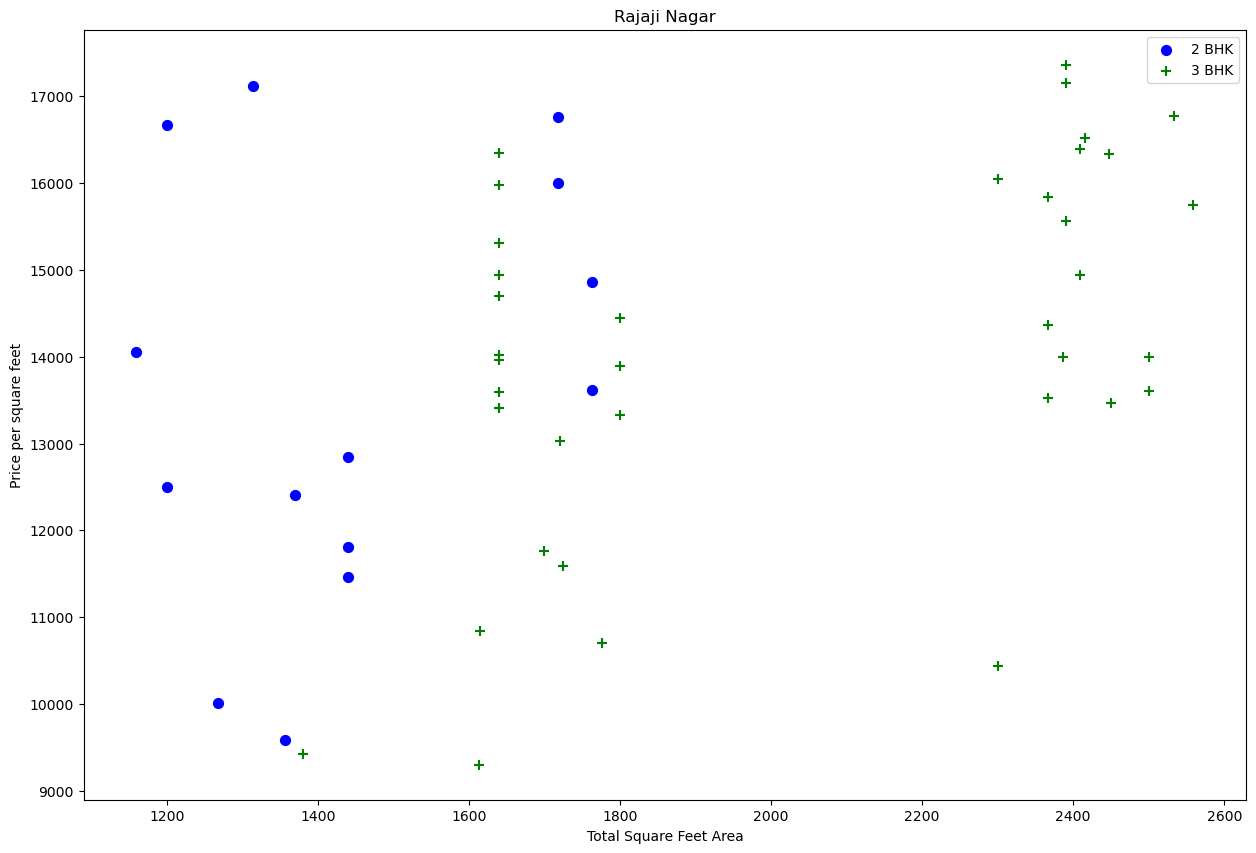

In [177]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.num_rooms==2)]
    bhk3=df[(df.location==location) & (df.num_rooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

In [184]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        # Change 'bhk' to 'num_rooms' in the next line
        for num_rooms, bhk_df in location_df.groupby("num_rooms"):
            bhk_stats[num_rooms] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for num_rooms, bhk_df in location_df.groupby('num_rooms'):
            stats = bhk_stats.get(num_rooms - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

df5 = remove_bhk_outliers(df4)
df5.shape


(7342, 7)

In [187]:
df5.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [189]:
df6=df5[df5.bath<df5.num_rooms+2]
df6

,location,size,total_sqft,bath,price,num_rooms,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10233,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,8368.200837
10234,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382.978723
10236,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,7400.000000
10241,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277.628032


In [192]:
df7 = df6.drop(columns=['size','price_per_sqft'])

In [194]:
df7.head(20)

,location,total_sqft,bath,price,num_rooms
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,47.0,2


# MODEL BUILDING

In [198]:
dummies=pd.get_dummies(df7.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
df11 = pd.concat([df7, dummies],axis='columns')
df11 = df11[df11['location'] != 'Kadubeesanahalli']

In [214]:
X=df11.drop('price',axis='columns')
X.head()

,location,total_sqft,bath,num_rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
preprocessor = ColumnTransformer(
    transformers=[('location', OneHotEncoder(), ['location'])],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

In [230]:
X = pd.DataFrame(df11)

# Separate features (X) and target variable (y)
X_features = X.drop('price', axis='columns')
y = X['price']

# Perform one-hot encoding for the 'location' column
X_location_dummies = pd.get_dummies(X_features['location'], drop_first=True)

# Concatenate the one-hot encoded location columns with the original features
X_encoded = pd.concat([X_features.drop('location', axis='columns'), X_location_dummies], axis='columns')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=10)

# Initialize and fit the linear regression model
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Evaluate the model
score = lr_clf.score(X_test, y_test)

In [231]:
score

0.8490120327443209